In [4]:
import sys
from pathlib import Path

import synthcity.logger as log
from synthcity.benchmark import Benchmarks
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader
from synthcity.utils.serialization import load_from_file, save_to_file

from datasets import get_dataset

log.remove()
log.add(sink=sys.stderr, level="INFO")

out_dir = Path("output")


def evaluate_dataset(dataset: str, plugin: tuple, repeats: int = 2):
    df, duration_col, event_col, time_horizons = get_dataset(dataset)
    dataloader = SurvivalAnalysisDataLoader(
        df,
        target_column=event_col,
        time_to_event_column=duration_col,
        time_horizons=time_horizons,
    )
    bkp = out_dir / f"metrics.{dataset}_{plugin[0]}.bkp"

    if bkp.exists():
        score = load_from_file(bkp)
    else:
        score = Benchmarks.evaluate(
            [plugin],
            dataloader,
            task_type="survival_analysis",
            target_column=event_col,
            time_to_event_column=duration_col,
            time_horizons=time_horizons,
            synthetic_size=len(df),
            repeats=repeats,
            metrics={
                "performance": ["linear_model", "xgb"],
                "stats": ["survival_km_distance"],
            },
        )
        save_to_file(bkp, score)

    return score

In [5]:
eval_plugin = ("survival_survae", "survae", {})

In [3]:
evaluate_dataset("aids", eval_plugin)

[2022-07-29T02:08:32.222685+0300][112440][INFO] Testcase : survival_survae
[2022-07-29T02:08:32.223770+0300][112440][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 1772407149569308346
[2022-07-29T02:08:32.314803+0300][112440][INFO] 
            Training SurVAE using
                dataloader_sampling_strategy = imbalanced_time_censoring;
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                device=cuda
            
[2022-07-29T02:08:32.331283+0300][112440][INFO] Using imbalanced time and censoring sampling
[2022-07-29T02:08:32.866730+0300][112440][INFO] Train the uncensoring model
[2022-07-29T02:08:40.821580+0300][112440][INFO] Train the synthetic generator
[2022-07-29T02:09:19.215832+0300][112440][INFO]  Performance eval for df hash = 757164186681983923 ood hash = 8494999128456487020
[2022-07-29T02:09:19.648283+0300][112440][INFO]  Performance eval for df hash = 495981488437

{'survival_survae':                                               min       max      mean  \
 stats.survival_km_distance.optimism      0.046434  0.048901  0.047667   
 stats.survival_km_distance.abs_optimism  0.046434  0.048901  0.047667   
 stats.survival_km_distance.sightedness   0.000000  0.000000  0.000000   
 performance.xgb.gt.c_index               0.718731  0.718731  0.718731   
 performance.xgb.gt.brier_score           0.066260  0.066260  0.066260   
 performance.xgb.syn_id.c_index           0.744909  0.746906  0.745908   
 performance.xgb.syn_id.brier_score       0.069403  0.069787  0.069595   
 performance.xgb.syn_ood.c_index          0.617830  0.658877  0.638353   
 performance.xgb.syn_ood.brier_score      0.058237  0.058429  0.058333   
 
                                            stddev    median       iqr rounds  \
 stats.survival_km_distance.optimism      0.001233  0.047667  0.001233      2   
 stats.survival_km_distance.abs_optimism  0.001233  0.047667  0.001233      2

In [4]:
score = evaluate_dataset("aids", eval_plugin)
Benchmarks.print(score)


Plugin : survival_survae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
stats.survival_km_distance.optimism,0.046434,0.048901,0.047667,0.001233,0.047667,0.001233,2,0,2.28
stats.survival_km_distance.abs_optimism,0.046434,0.048901,0.047667,0.001233,0.047667,0.001233,2,0,2.28
stats.survival_km_distance.sightedness,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0,2.28
performance.xgb.gt.c_index,0.718731,0.718731,0.718731,0.000000,0.718731,0.000000,2,0,59.84
performance.xgb.gt.brier_score,0.066260,0.066260,0.066260,0.000000,0.066260,0.000000,2,0,59.84
performance.xgb.syn_id.c_index,0.744909,0.746906,0.745908,0.000998,0.745908,0.000998,2,0,59.84
performance.xgb.syn_id.brier_score,0.069403,0.069787,0.069595,0.000192,0.069595,0.000192,2,0,59.84
performance.xgb.syn_ood.c_index,0.617830,0.658877,0.638353,0.020523,0.638353,0.020523,2,0,59.84
performance.xgb.syn_ood.brier_score,0.058237,0.058429,0.058333,0.000096,0.058333,0.000096,2,0,59.84


In [5]:
evaluate_dataset("cutract", eval_plugin)

[2022-07-29T02:11:59.060213+0300][112440][INFO] Testcase : survival_survae
[2022-07-29T02:11:59.061133+0300][112440][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 6478696356337036839
[2022-07-29T02:11:59.064011+0300][112440][INFO] 
            Training SurVAE using
                dataloader_sampling_strategy = imbalanced_time_censoring;
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                device=cuda
            
[2022-07-29T02:11:59.081691+0300][112440][INFO] Using imbalanced time and censoring sampling
[2022-07-29T02:12:00.231697+0300][112440][INFO] Train the uncensoring model
[2022-07-29T02:12:27.817244+0300][112440][INFO] Train the synthetic generator
[2022-07-29T02:16:50.538682+0300][112440][INFO]  Performance eval for df hash = 283260249281990931 ood hash = 507210244145066407
[2022-07-29T02:16:56.782543+0300][112440][INFO] Baseline performance score: {'c_index': (0.79

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

[2022-07-29T02:19:27.436917+0300][112440][INFO] Using imbalanced time and censoring sampling
[2022-07-29T02:19:28.705643+0300][112440][INFO] Train the uncensoring model
[2022-07-29T02:19:53.245877+0300][112440][INFO] Train the synthetic generator
[2022-07-29T02:24:17.209349+0300][112440][INFO]  Performance eval for df hash = 283260249281990931 ood hash = 507210244145066407
[2022-07-29T02:24:23.249647+0300][112440][INFO] Baseline performance score: {'c_index': (0.79720460386624, 0.0008369801436984319), 'brier_score': (0.07729761499197284, 0.0010483456103119622)}
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: O

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

{'survival_survae':                                                    min       max      mean  \
 stats.survival_km_distance.optimism           0.089501  0.102650  0.096075   
 stats.survival_km_distance.abs_optimism       0.089501  0.102650  0.096075   
 stats.survival_km_distance.sightedness        0.105543  0.114567  0.110055   
 performance.linear_model.gt.c_index           0.797205  0.797205  0.797205   
 performance.linear_model.gt.brier_score       0.077298  0.077298  0.077298   
 performance.linear_model.syn_id.c_index       0.759345  0.793134  0.776240   
 performance.linear_model.syn_id.brier_score   0.094897  0.101575  0.098236   
 performance.linear_model.syn_ood.c_index      0.772225  0.819945  0.796085   
 performance.linear_model.syn_ood.brier_score  0.096606  0.102209  0.099407   
 performance.xgb.gt.c_index                    0.821364  0.821364  0.821364   
 performance.xgb.gt.brier_score                0.085135  0.085135  0.085135   
 performance.xgb.syn_id.c_index  

In [6]:
score = evaluate_dataset("cutract", eval_plugin)
Benchmarks.print(score)


Plugin : survival_survae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
stats.survival_km_distance.optimism,0.089501,0.102650,0.096075,0.006574,0.096075,0.006574,2,0,2.28
stats.survival_km_distance.abs_optimism,0.089501,0.102650,0.096075,0.006574,0.096075,0.006574,2,0,2.28
stats.survival_km_distance.sightedness,0.105543,0.114567,0.110055,0.004512,0.110055,0.004512,2,0,2.28
performance.linear_model.gt.c_index,0.797205,0.797205,0.797205,0.000000,0.797205,0.000000,2,0,13.05
performance.linear_model.gt.brier_score,0.077298,0.077298,0.077298,0.000000,0.077298,0.000000,2,0,13.05
performance.linear_model.syn_id.c_index,0.759345,0.793134,0.776240,0.016894,0.776240,0.016894,2,0,13.05
performance.linear_model.syn_id.brier_score,0.094897,0.101575,0.098236,0.003339,0.098236,0.003339,2,0,13.05
performance.linear_model.syn_ood.c_index,0.772225,0.819945,0.796085,0.023860,0.796085,0.023860,2,0,13.05
performance.linear_model.syn_ood.brier_score,0.096606,0.102209,0.099407,0.002802,0.099407,0.002802,2,0,13.05
performance.xgb.gt.c_index,0.821364,0.821364,0.821364,0.000000,0.821364,0.000000,2,0,138.58


In [7]:
evaluate_dataset("maggic", eval_plugin)

[2022-07-29T02:26:43.833296+0300][112440][INFO] Testcase : survival_survae
[2022-07-29T02:26:43.834019+0300][112440][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 610387800192351387
[2022-07-29T02:26:43.836240+0300][112440][INFO] 
            Training SurVAE using
                dataloader_sampling_strategy = imbalanced_time_censoring;
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                device=cuda
            
[2022-07-29T02:26:43.891068+0300][112440][INFO] Using imbalanced time and censoring sampling
[2022-07-29T02:26:47.407199+0300][112440][INFO] Train the uncensoring model
[2022-07-29T02:28:38.413101+0300][112440][INFO] Train the synthetic generator
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_

[2022-07-29T02:54:23.036576+0300][112440][INFO]  Performance eval for df hash = 6273730615073425304 ood hash = 4610329578003203168
[2022-07-29T02:54:53.421875+0300][112440][INFO] Baseline performance score: {'c_index': (0.6650744054702241, 0.005253297363658482), 'brier_score': (0.1445996874186872, 0.0045111209181546924)}
[2022-07-29T02:56:00.659575+0300][112440][INFO] Synthetic ID performance score: {'c_index': (0.5882684928353666, 0.0058157083498681685), 'brier_score': (0.2612657462513998, 0.006206694415860487)}
[2022-07-29T02:56:39.683235+0300][112440][INFO] Synthetic OOD performance score: {'c_index': (0.5817134050668736, 0.008554539437559839), 'brier_score': (0.26901993210814085, 0.032565943405460214)}
[2022-07-29T02:56:39.768760+0300][112440][INFO]  Performance eval for df hash = 5865208746083508490 ood hash = 1613901481067260698
[2022-07-29T02:59:01.096630+0300][112440][INFO] Baseline performance score: {'c_index': (0.6680523702674087, 0.0045109818587865036), 'brier_score': (0.14

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

{'survival_survae':                                                    min       max      mean  \
 stats.survival_km_distance.optimism          -0.065131 -0.065131 -0.065131   
 stats.survival_km_distance.abs_optimism       0.076100  0.076100  0.076100   
 stats.survival_km_distance.sightedness        0.000000  0.000000  0.000000   
 performance.linear_model.gt.c_index           0.665074  0.665074  0.665074   
 performance.linear_model.gt.brier_score       0.144600  0.144600  0.144600   
 performance.linear_model.syn_id.c_index       0.588268  0.588268  0.588268   
 performance.linear_model.syn_id.brier_score   0.261266  0.261266  0.261266   
 performance.linear_model.syn_ood.c_index      0.581713  0.581713  0.581713   
 performance.linear_model.syn_ood.brier_score  0.269020  0.269020  0.269020   
 performance.xgb.gt.c_index                    0.668052  0.668052  0.668052   
 performance.xgb.gt.brier_score                0.149252  0.149252  0.149252   
 performance.xgb.syn_id.c_index  

In [8]:
score = evaluate_dataset("maggic", eval_plugin)
Benchmarks.print(score)


Plugin : survival_survae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
stats.survival_km_distance.optimism,-0.065131,-0.065131,-0.065131,0.0,-0.065131,0.0,2,0,2.67
stats.survival_km_distance.abs_optimism,0.076100,0.076100,0.076100,0.0,0.076100,0.0,2,0,2.67
stats.survival_km_distance.sightedness,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2,0,2.67
performance.linear_model.gt.c_index,0.665074,0.665074,0.665074,0.0,0.665074,0.0,2,0,132.86
performance.linear_model.gt.brier_score,0.144600,0.144600,0.144600,0.0,0.144600,0.0,2,0,132.86
performance.linear_model.syn_id.c_index,0.588268,0.588268,0.588268,0.0,0.588268,0.0,2,0,132.86
performance.linear_model.syn_id.brier_score,0.261266,0.261266,0.261266,0.0,0.261266,0.0,2,0,132.86
performance.linear_model.syn_ood.c_index,0.581713,0.581713,0.581713,0.0,0.581713,0.0,2,0,132.86
performance.linear_model.syn_ood.brier_score,0.269020,0.269020,0.269020,0.0,0.269020,0.0,2,0,132.86
performance.xgb.gt.c_index,0.668052,0.668052,0.668052,0.0,0.668052,0.0,2,0,289.17


In [9]:
evaluate_dataset("metabric", eval_plugin)

[2022-07-29T03:34:46.792341+0300][112440][INFO] Testcase : survival_survae
[2022-07-29T03:34:46.793447+0300][112440][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 3502517472120738810
[2022-07-29T03:34:46.796495+0300][112440][INFO] 
            Training SurVAE using
                dataloader_sampling_strategy = imbalanced_time_censoring;
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                device=cuda
            
[2022-07-29T03:34:47.319990+0300][112440][INFO] Using imbalanced time and censoring sampling
[2022-07-29T03:34:48.195105+0300][112440][INFO] Train the uncensoring model
[2022-07-29T03:35:11.172246+0300][112440][INFO] Train the synthetic generator
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/

[2022-07-29T04:20:24.466598+0300][112440][INFO]  Performance eval for df hash = 4392546224436873727 ood hash = 8054839783495393478
[2022-07-29T04:20:28.891512+0300][112440][INFO]  Performance eval for df hash = 1529211813084290759 ood hash = 3165247004157233688
OMP: Warning #191: Forking a process while a parallel region is active is potentially unsafe.
[2022-07-29T04:21:27.007493+0300][112440][INFO] Baseline performance score: {'c_index': (0.7221485593229714, 0.01745996212394389), 'brier_score': (0.1586011076729401, 0.01304793801028187)}
[2022-07-29T04:21:50.363666+0300][112440][INFO] Synthetic ID performance score: {'c_index': (0.6895471084569542, 0.026537288665907145), 'brier_score': (0.20041104950920516, 0.030884284867116526)}
[2022-07-29T04:22:14.822411+0300][112440][INFO] Synthetic OOD performance score: {'c_index': (0.7364392293121149, 0.06122162111464899), 'brier_score': (0.19356308251816942, 0.02324708173503204)}
[2022-07-29T04:22:14.855102+0300][112440][INFO] [testcase] Exper

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

{'survival_survae':                                               min       max      mean  \
 stats.survival_km_distance.optimism     -0.119850 -0.112265 -0.116058   
 stats.survival_km_distance.abs_optimism  0.121561  0.126370  0.123966   
 stats.survival_km_distance.sightedness   0.168500  0.203750  0.186125   
 performance.xgb.gt.c_index               0.722149  0.722149  0.722149   
 performance.xgb.gt.brier_score           0.158601  0.158601  0.158601   
 performance.xgb.syn_id.c_index           0.673331  0.689547  0.681439   
 performance.xgb.syn_id.brier_score       0.195172  0.200411  0.197792   
 performance.xgb.syn_ood.c_index          0.713058  0.736439  0.724749   
 performance.xgb.syn_ood.brier_score      0.189723  0.193563  0.191643   
 
                                            stddev    median       iqr rounds  \
 stats.survival_km_distance.optimism      0.003792 -0.116058  0.003792      2   
 stats.survival_km_distance.abs_optimism  0.002404  0.123966  0.002404      2

In [10]:
score = evaluate_dataset("metabric", eval_plugin)
Benchmarks.print(score)


Plugin : survival_survae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
stats.survival_km_distance.optimism,-0.119850,-0.112265,-0.116058,0.003792,-0.116058,0.003792,2,0,1.51
stats.survival_km_distance.abs_optimism,0.121561,0.126370,0.123966,0.002404,0.123966,0.002404,2,0,1.51
stats.survival_km_distance.sightedness,0.168500,0.203750,0.186125,0.017625,0.186125,0.017625,2,0,1.51
performance.xgb.gt.c_index,0.722149,0.722149,0.722149,0.000000,0.722149,0.000000,2,0,85.48
performance.xgb.gt.brier_score,0.158601,0.158601,0.158601,0.000000,0.158601,0.000000,2,0,85.48
performance.xgb.syn_id.c_index,0.673331,0.689547,0.681439,0.008108,0.681439,0.008108,2,0,85.48
performance.xgb.syn_id.brier_score,0.195172,0.200411,0.197792,0.002620,0.197792,0.002620,2,0,85.48
performance.xgb.syn_ood.c_index,0.713058,0.736439,0.724749,0.011690,0.724749,0.011690,2,0,85.48
performance.xgb.syn_ood.brier_score,0.189723,0.193563,0.191643,0.001920,0.191643,0.001920,2,0,85.48


/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

In [3]:
score = evaluate_dataset("seer", eval_plugin)

[2022-07-29T19:27:41.561941+0300][119908][INFO] Testcase : survival_survae
[2022-07-29T19:27:41.562681+0300][119908][INFO] [testcase] Experiment repeat: 0 task type: survival_analysis Train df hash = 766078731605104406
[2022-07-29T19:27:41.614180+0300][119908][INFO] 
            Training SurVAE using
                tte_strategy = survival_function;
                uncensoring_model=survival_function_regression
                device=cuda
            
[2022-07-29T19:27:41.798577+0300][119908][INFO] Train the uncensoring model
[2022-07-29T19:39:02.591871+0300][119908][INFO] Train the synthetic generator
[2022-07-29T20:21:33.482136+0300][119908][INFO]  Performance eval for df hash = 1705053108406229065 ood hash = 3000337835799052829
[2022-07-29T20:22:00.602245+0300][119908][INFO] Baseline performance score: {'c_index': (0.847640045256043, 0.004887193900911149), 'brier_score': (0.02092725218726445, 0.0001671966491226141)}
[2022-07-29T20:24:51.360648+0300][119908][INFO] Synthetic ID perfor

In [4]:
score = evaluate_dataset("seer", eval_plugin)
Benchmarks.print(score)


Plugin : survival_survae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
stats.survival_km_distance.optimism,0.025302,0.025302,0.025302,0.0,0.025302,0.0,2,0,1.72
stats.survival_km_distance.abs_optimism,0.025302,0.025302,0.025302,0.0,0.025302,0.0,2,0,1.72
stats.survival_km_distance.sightedness,0.177733,0.177733,0.177733,0.0,0.177733,0.0,2,0,1.72
performance.linear_model.gt.c_index,0.847640,0.847640,0.847640,0.0,0.847640,0.0,2,0,251.84
performance.linear_model.gt.brier_score,0.020927,0.020927,0.020927,0.0,0.020927,0.0,2,0,251.84
performance.linear_model.syn_id.c_index,0.575124,0.575124,0.575124,0.0,0.575124,0.0,2,0,251.84
performance.linear_model.syn_id.brier_score,0.025049,0.025049,0.025049,0.0,0.025049,0.0,2,0,251.84
performance.linear_model.syn_ood.c_index,0.571477,0.571477,0.571477,0.0,0.571477,0.0,2,0,251.84
performance.linear_model.syn_ood.brier_score,0.024530,0.024530,0.024530,0.0,0.024530,0.0,2,0,251.84
performance.xgb.gt.c_index,0.850645,0.850645,0.850645,0.0,0.850645,0.0,2,0,820.94


/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/lib/python3.8/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/code/anaconda3/envs/py38/li

In [13]:
import string
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from lifelines import KaplanMeierFitter
from sklearn.manifold import TSNE
from synthcity.plugins import Plugins
from synthcity.utils.serialization import dataframe_hash, load_from_file, save_to_file

out_dir = Path("workspace_rebuttal")
fontsize = 14
plt.style.use("seaborn-whitegrid")


def map_models(model):
    return {
        "survival_gan": "SurvivalGAN",
        "adsgan": "AdsGAN",
        "ctgan": "CTGAN",
        "tvae": "TVAE",
        "privbayes": "PrivBayes",
        "nflow": "nFlows",
        "gmm": "GMM",
        "survae": "Survival VAE",
    }[model]


def map_dataset(dataset):
    custom = {
        "maggic": "pheart",
    }
    if dataset in custom:
        return custom[dataset]

    return dataset


def plot_km(
    ax,
    title,
    T: pd.Series,
    E: pd.Series,
    syn_T: pd.Series,
    syn_E: pd.Series,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    show_censors: bool = False,
    syn_label: str = None,
    xaxis_label: str = None,
    yaxis_label: str = None,
    show_title: bool = True,
) -> None:
    gt_kmf = KaplanMeierFitter()
    gt_kmf.fit(T, E, label="Real data")  # t = Timepoints, Rx: 0=censored, 1=event
    ax = gt_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )

    if syn_label is None:
        syn_label = "Synthetic data"

    syn_kmf = KaplanMeierFitter()
    syn_kmf.fit(
        syn_T, syn_E, label=syn_label
    )  # t = Timepoints, Rx: 0=censored, 1=event
    ax = syn_kmf.plot(
        ax=ax, ci_show=ci_show, ci_alpha=ci_alpha, show_censors=show_censors
    )
    ax.axvline(T[E == 1].max(), color="r", linestyle="--")  # vertical
    if show_title:
        ax.set_xlabel(title, horizontalalignment="center")
    else:
        ax.set_xlabel("Days", horizontalalignment="center")

    if yaxis_label is None:
        yaxis_label = "Temporal fidelity(Kaplan-Meier)"
    ax.set_ylabel(yaxis_label)


subsample = 10000


def plot_tsne(ax, proj_real: pd.DataFrame, df_syn: pd.DataFrame,) -> None:
    weights = df_syn[event_col].copy()
    counts = weights.value_counts()
    weights[weights == 0] = counts[0] / len(weights)
    weights[weights == 1] = counts[1] / len(weights)

    tsne_syn = TSNE(n_components=2, random_state=0)
    proj_syn = pd.DataFrame(
        tsne_syn.fit_transform(df_syn.sample(subsample, weights=weights))
    )

    ax.scatter(x=proj_real[0], y=proj_real[1], s=3, alpha=0.8, label="Real data")
    ax.scatter(x=proj_syn[0], y=proj_syn[1], s=3, alpha=0.8, label="Synthetic data")
    ax.set_ylabel("Covariate diversity(t-SNE)", fontsize=fontsize)


def plot_2d(
    dataset: str,
    models: list,
    individual: bool = False,
    ci_show: bool = True,
    ci_alpha: float = 0.2,
    repeat_id: int = 0,
    save: bool = False,
    **kwargs,
):
    df, duration_col, event_col, time_horizons = get_dataset(ref_df)

    df_hash = dataframe_hash(df)

    weights = df[event_col].copy()
    counts = weights.value_counts()
    weights[weights == 0] = counts[0] / len(weights)
    weights[weights == 1] = counts[1] / len(weights)

    tsne = TSNE(n_components=2, random_state=0)
    proj_real = pd.DataFrame(tsne.fit_transform(df.sample(subsample, weights=weights)))

    fig, axs = plt.subplots(2, len(models), figsize=(4 * len(models), 6))

    for idx, model in enumerate(models):
        model_bkp = out_dir / f"{df_hash}_{model}_{repeat_id}.bkp"
        if model_bkp.exists():
            syn_df = load_from_file(model_bkp)
            try:
                syn_df = syn_df.dataframe()
            except:
                pass
        else:
            print(model_bkp, "missing")
            continue

        plot_tsne(axs[0][idx], proj_real, syn_df)
        plot_km(
            axs[1][idx],
            map_models(model),
            df[duration_col],
            df[event_col],
            syn_df[duration_col],
            syn_df[event_col],
        )

    fig.suptitle(f"Dataset: {map_dataset(dataset)}", fontsize=16)
    plt.tight_layout()

    if save:
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.pdf")
        plt.savefig(f"diagrams/fidelity_grouped_{dataset}.png")
    plt.show()

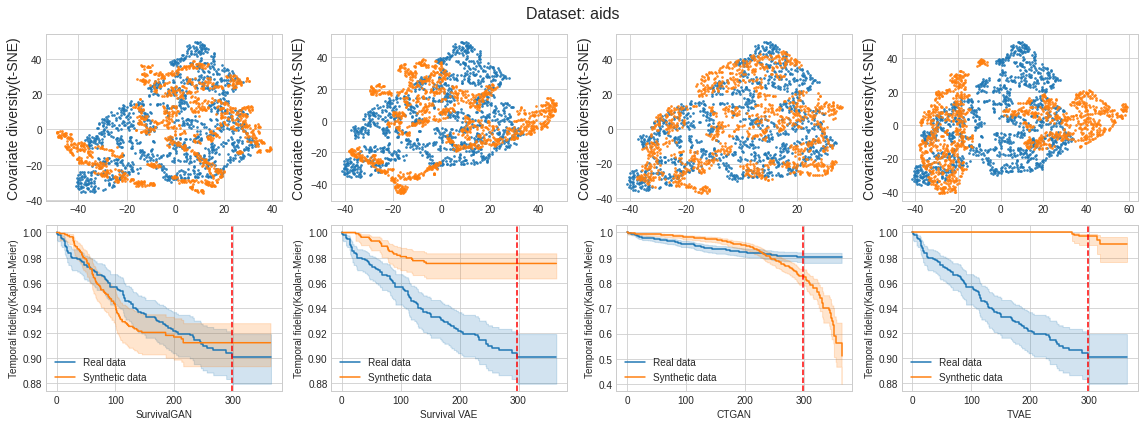

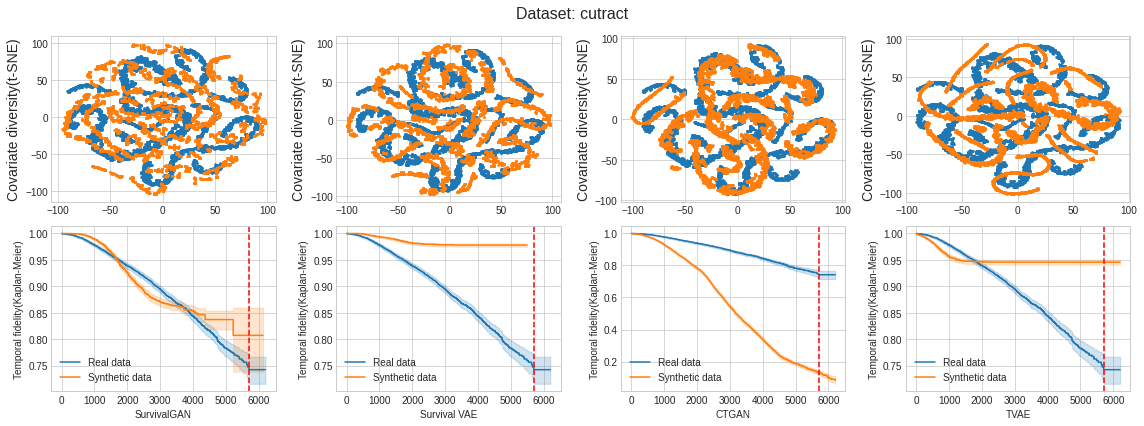

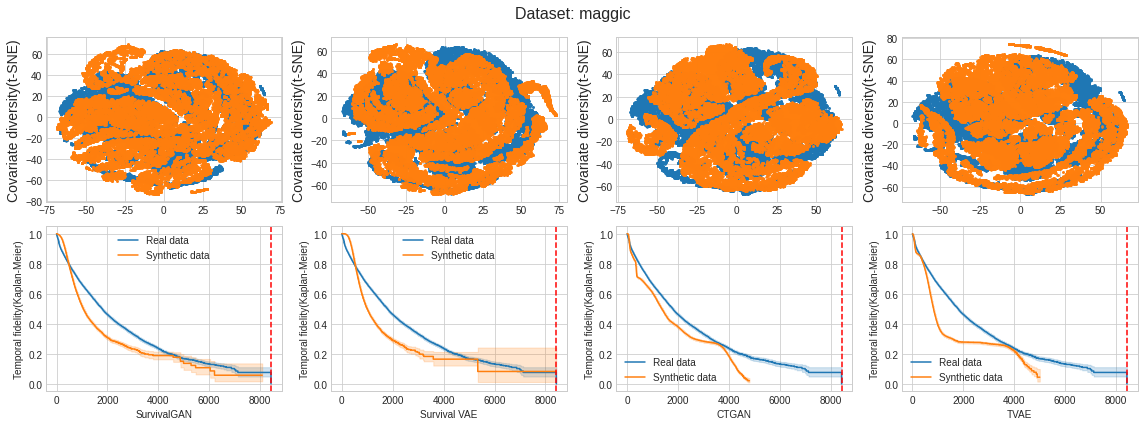

In [16]:
methods = ["survival_gan", "survae", "ctgan", "tvae"]

for ref_df in ["aids", "cutract", "maggic"]:
    plot_2d(ref_df, methods, repeat_id=1)

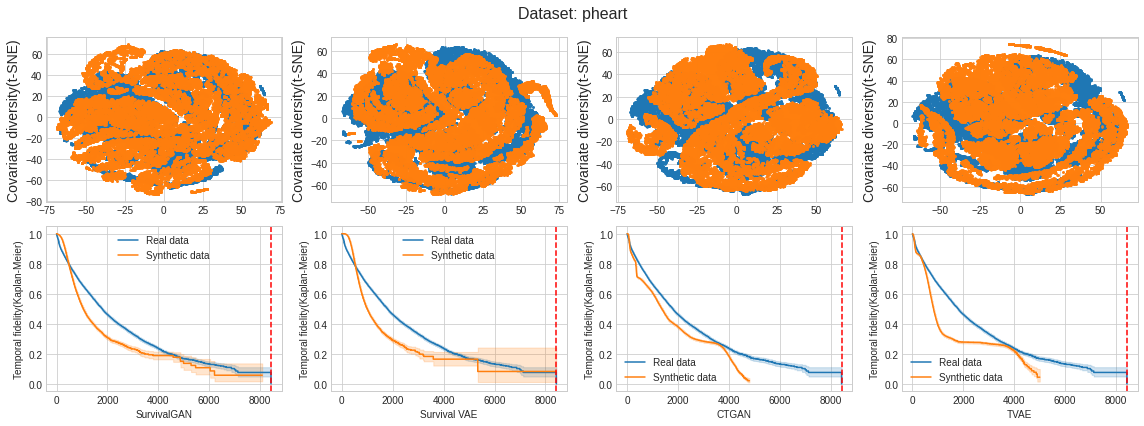

In [4]:
methods = ["survival_gan", "survae", "ctgan", "tvae"]

for ref_df in ["maggic"]:
    plot_2d(ref_df, methods, repeat_id=1)

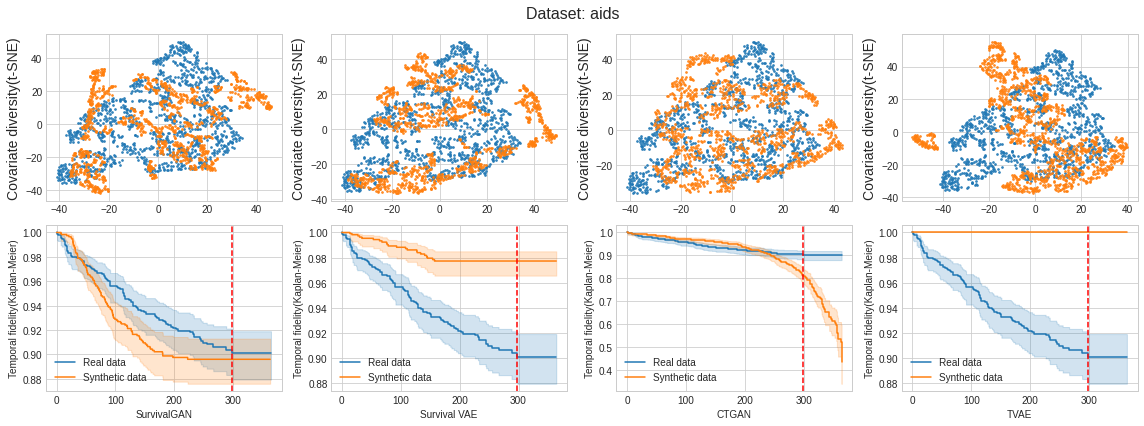

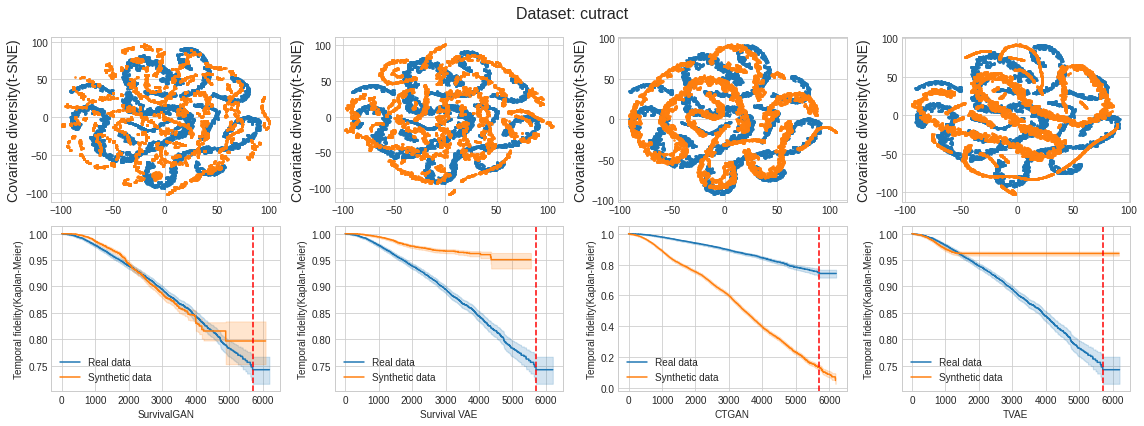

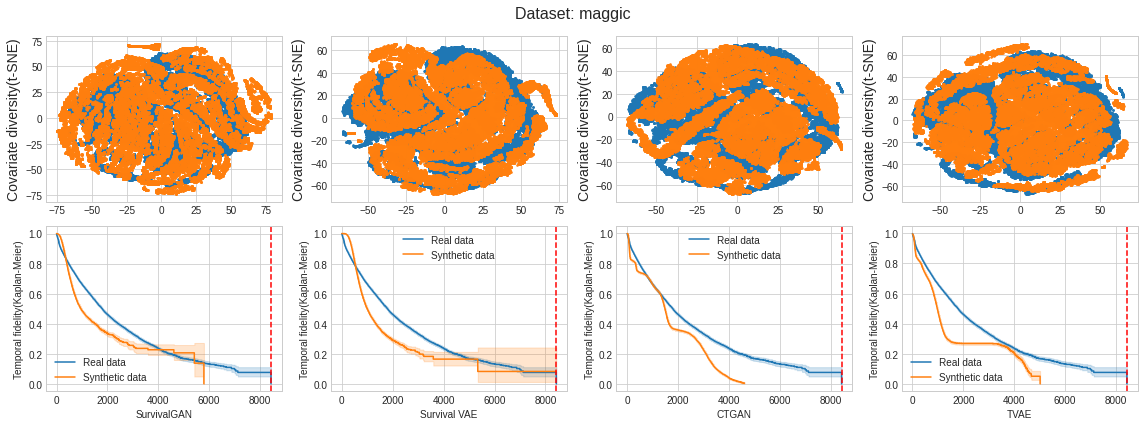

In [17]:
methods = ["survival_gan", "survae", "ctgan", "tvae"]

for ref_df in ["aids", "cutract", "maggic"]:
    plot_2d(ref_df, methods, repeat_id=0)

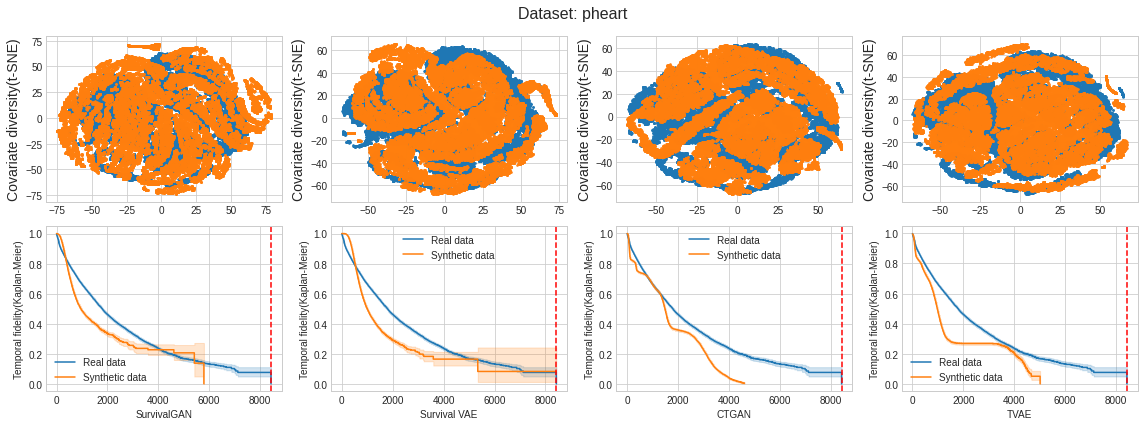

In [5]:
methods = ["survival_gan", "survae", "ctgan", "tvae"]

for ref_df in ["maggic"]:
    plot_2d(ref_df, methods, repeat_id=0)

workspace_rebuttal/5872792679937530807_survae_0.bkp missing


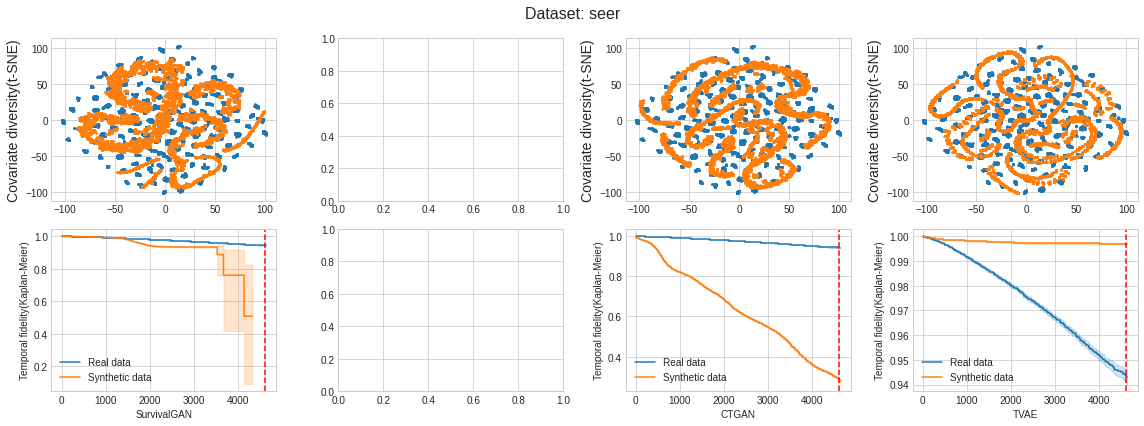

In [15]:
methods = ["survival_gan", "survae", "ctgan", "tvae"]

for ref_df in ["seer"]:
    plot_2d(ref_df, methods, repeat_id=0)

In [46]:
from pathlib import Path

from adjutorium.utils.metrics import generate_score, print_score
from synthcity.benchmark import Benchmarks
from synthcity.metrics.eval_statistical import SurvivalKMDistance
from synthcity.plugins.core.dataloader import SurvivalAnalysisDataLoader
from synthcity.utils.serialization import dataframe_hash, load_from_file, save_to_file

out_dir = Path("workspace_rebuttal")


def eval_survival_metrics(
    dataset: str, models: list, **kwargs,
):
    df, duration_col, event_col, time_horizons = get_dataset(dataset)

    dataloader = SurvivalAnalysisDataLoader(
        df,
        target_column=event_col,
        time_to_event_column=duration_col,
        time_horizons=time_horizons,
    )
    df_hash = dataframe_hash(df)

    for idx, model in enumerate(models):
        optimism = []
        abs_optimism = []
        sightedness = []

        for repeat_id in range(2):
            model_bkp = out_dir / f"{df_hash}_{model}_{model}__{repeat_id}.bkp"
            syn_df = load_from_file(model_bkp)
            try:
                syn_df = syn_df.dataframe()
            except:
                pass

            syn_loader = SurvivalAnalysisDataLoader(
                syn_df,
                target_column=event_col,
                time_to_event_column=duration_col,
                time_horizons=time_horizons,
            )
            score = SurvivalKMDistance(task_type="survival_analysis").evaluate(
                dataloader, syn_loader
            )
            optimism.append(score["optimism"])
            abs_optimism.append(score["abs_optimism"])
            sightedness.append(score["sightedness"])
        print(">>>> Model", model)
        print("         optimism", print_score(generate_score(optimism)))
        print("         abs_optimism", print_score(generate_score(abs_optimism)))
        print("         sightedness", print_score(generate_score(sightedness)))

In [38]:
models = ["survival_gan", "survae", "ctgan", "tvae"]

eval_survival_metrics("aids", models)

>>>> Model survival_gan
         optimism -0.008 +/- 0.008
         abs_optimism 0.012 +/- 0.004
         sightedness 0.003 +/- 0.001
>>>> Model survae
         optimism 0.048 +/- 0.002
         abs_optimism 0.048 +/- 0.002
         sightedness 0.0 +/- 0.0
>>>> Model ctgan
         optimism -0.031 +/- 0.008
         abs_optimism 0.055 +/- 0.001
         sightedness 0.0 +/- 0.0
>>>> Model tvae
         optimism 0.065 +/- 0.001
         abs_optimism 0.065 +/- 0.001
         sightedness 0.0 +/- 0.0


In [39]:
models = ["survival_gan", "survae", "ctgan", "tvae"]

eval_survival_metrics("cutract", models)

>>>> Model survival_gan
         optimism 0.01 +/- 0.002
         abs_optimism 0.018 +/- 0.007
         sightedness 0.015 +/- 0.005
>>>> Model survae
         optimism 0.096 +/- 0.009
         abs_optimism 0.096 +/- 0.009
         sightedness 0.11 +/- 0.006
>>>> Model ctgan
         optimism -0.334 +/- 0.008
         abs_optimism 0.334 +/- 0.008
         sightedness 0.002 +/- 0.002
>>>> Model tvae
         optimism 0.079 +/- 0.011
         abs_optimism 0.083 +/- 0.007
         sightedness 0.002 +/- 0.002


In [40]:
models = ["survival_gan", "survae", "ctgan", "tvae"]

eval_survival_metrics("maggic", models)

>>>> Model survival_gan
         optimism -0.066 +/- 0.006
         abs_optimism 0.075 +/- 0.01
         sightedness 0.177 +/- 0.189
>>>> Model survae
         optimism -0.065 +/- 0.0
         abs_optimism 0.076 +/- 0.0
         sightedness 0.0 +/- 0.0
>>>> Model ctgan
         optimism -0.093 +/- 0.018
         abs_optimism 0.094 +/- 0.018
         sightedness 0.441 +/- 0.016
>>>> Model tvae
         optimism -0.102 +/- 0.013
         abs_optimism 0.102 +/- 0.013
         sightedness 0.405 +/- 0.001


In [47]:
models = ["survival_gan", "survae", "ctgan", "tvae"]

eval_survival_metrics("metabric", models)

>>>> Model survival_gan
         optimism -0.111 +/- 0.005
         abs_optimism 0.119 +/- 0.003
         sightedness 0.148 +/- 0.089
>>>> Model survae
         optimism -0.111 +/- 0.005
         abs_optimism 0.119 +/- 0.003
         sightedness 0.148 +/- 0.089
>>>> Model ctgan
         optimism 0.039 +/- 0.08
         abs_optimism 0.097 +/- 0.009
         sightedness 0.0 +/- 0.0
>>>> Model tvae
         optimism 0.033 +/- 0.023
         abs_optimism 0.059 +/- 0.003
         sightedness 0.061 +/- 0.047
